We explore the datasets provided by NEA through the data.gov.sg [developers portal](https://developers.data.gov.sg/).

For the weather forecasts and environemntal data, the data parameter retreives all the forecasts issued for the day. The date_time parameter retreives the latest forecast issued as of that time. 

In [3]:
# Read the api key
key = open("data-key.txt").read()

# import library 
import requests

** 2 hour weather forecast ** 

The latest 2-hour weather forecast retreived half-hourly. Use date_time parameter to retreive the latest forecast issued at that moment in time or use the date parameter to retreive all the forecasts issued for that day. 

In [4]:
two_hour_cast = requests.get(
                'https://api.data.gov.sg/v1/environment/2-hour-weather-forecast',
                 params = {"date_time": "2017-04-12T16:00:00"},
                 headers = {"api-key":key}).json()

In [4]:
# forecast for area : Clementi 
clementi_location_id = 11
print('Forecast for Clementi region, next two hours : ')
print(two_hour_cast['items'][0]['forecasts'][11]['forecast'])

Forecast for Clementi region, next two hours : 
Cloudy


** 24 hour weather forecast **

The latest 24-hour forecast retreived multiple times throughout the day. Use date_time parameter to retreive the latest forecast issued at that moment in time or use the date parameter to retreive all the forecasts issued for that day. 
This gives the forecast only for major regions (i.e central, east, west, north, south)

In [5]:
# get the latest forecast issued 
daily_forecast = requests.get(
                'https://api.data.gov.sg/v1/environment/24-hour-weather-forecast',
                 params = {"date_time": "2017-04-12T16:00:00"},
                 headers = {"api-key":key}).json()

In [6]:
# getting the latest forecast for west region for the valid future time periods
periods_list = daily_forecast['items'][0]['periods']

for i in range(0, len(periods_list)):
    print("Forecast for west region: " + periods_list[i]['regions']['west'])
    print("Time period: "+ periods_list[i]['time']['start'] + " to " + periods_list[i]['time']['end'])
    print()

Forecast for west region: Showers
Time period: 2017-04-12T12:00:00+08:00 to 2017-04-12T18:00:00+08:00

Forecast for west region: Partly Cloudy (Night)
Time period: 2017-04-12T18:00:00+08:00 to 2017-04-13T06:00:00+08:00

Forecast for west region: Cloudy
Time period: 2017-04-13T06:00:00+08:00 to 2017-04-13T12:00:00+08:00



** 4 day weather forecast **

The latest 4 day weather forecast retreived twice a day from NEA. Returns general forecast for Singapore for the next four days.  

In [4]:
four_day_forecast = requests.get(
                'https://api.data.gov.sg/v1/environment/4-day-weather-forecast',
                 params = {"date_time": "2017-04-12T16:00:00"},
                 headers = {"api-key":key}).json()

In [8]:
four_day_forecast['items'][0]

{'forecasts': [{'date': '2017-04-13',
   'forecast': 'Morning thundery showers.',
   'relative_humidity': {'high': 95, 'low': 60},
   'temperature': {'high': 33, 'low': 24},
   'timestamp': '2017-04-13T00:00:00+08:00',
   'wind': {'direction': 'VARIABLE', 'speed': {'high': 15, 'low': 5}}},
  {'date': '2017-04-14',
   'forecast': 'Afternoon thundery showers.',
   'relative_humidity': {'high': 95, 'low': 55},
   'temperature': {'high': 34, 'low': 24},
   'timestamp': '2017-04-14T00:00:00+08:00',
   'wind': {'direction': 'ENE', 'speed': {'high': 20, 'low': 10}}},
  {'date': '2017-04-15',
   'forecast': 'Afternoon thundery showers.',
   'relative_humidity': {'high': 95, 'low': 55},
   'temperature': {'high': 34, 'low': 24},
   'timestamp': '2017-04-15T00:00:00+08:00',
   'wind': {'direction': 'ENE', 'speed': {'high': 20, 'low': 10}}},
  {'date': '2017-04-16',
   'forecast': 'Afternoon thundery showers.',
   'relative_humidity': {'high': 95, 'low': 55},
   'temperature': {'high': 34, 'low':

** Air temperature **

Get per-minute readings of air temperature across Singapore. 

In [9]:
# Using the date_time parameter 
# the latest temperature reading as of this time specified in date_time 
air_temperature_now = requests.get(
                'https://api.data.gov.sg/v1/environment/air-temperature',
                 params = {"date_time": "2017-04-12T16:00:00"},
                 headers = {"api-key":key}).json()

#### Finding the closest Station

In [49]:
# Use Haversine formula for getting distance between two locations 
# implementation from https://rosettacode.org/wiki/Haversine_formula#Python
from math import radians, sin, cos, sqrt, asin
 
def haversine(lat1, lon1, lat2, lon2):
 
    R = 6372.8 # Earth radius in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c

In [50]:
# Find the closest station to our current location 
our_location = [1.298666, 103.772451]

station_name = []
station_id = []
distance = []

# find the distance between our locations to the station locations 

for x in air_temperature_now['metadata']['stations']:
    station_name.append(x['name'])
    station_id.append(x['id'])
    
    latitude = x['location']['latitude']
    longitude = x['location']['longitude']
    
    distance.append( haversine(latitude, longitude, our_location[0], our_location[1]) )

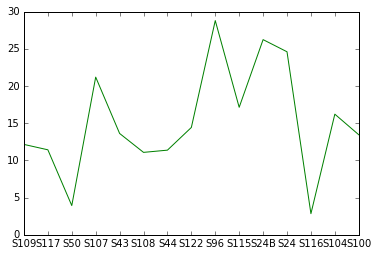

In [61]:
import pylab

pylab.figure(1)
x = range(len(air_temperature_now['metadata']['stations']))
pylab.xticks(x, station_id)
pylab.plot(x, distance ,"g")

pylab.show()

In [69]:
# finding the nearest station 
min_dist = distance.index(min(distance))
print('Station Name : ' + station_name[min_dist]) 
print('Station ID : ' + station_id[min_dist]) 

Station Name : West Coast Highway
Station ID : S116


In [10]:
# clementi road location id 
location_id = 2

# get the station id for the Clementi Road weather station 
station_id = air_temperature_now['metadata']['stations'][location_id]['id']

# get the air temperature reading for the particular station id
print(air_temperature_now['items'][0]['timestamp'])
print(air_temperature_now['items'][0]['readings'][location_id])

2017-04-12T15:59:59+08:00
{'station_id': 'S50', 'value': 30.4}


In [11]:
# Using the date parameter, temperature readings for the whole day
air_temperature = requests.get(
                'https://api.data.gov.sg/v1/environment/air-temperature',
                 params = {"date": "2016-04-12"},
                 headers = {"api-key":key}).json()

# Note: This request takes more time and responds with message : endpoint request timed out 

** Rainfall **

Get 5-minute readings of rainfall across Singapore. 

In [12]:
# get the latest rainfall using date_time parameter 
rainfall_now = requests.get(
                'https://api.data.gov.sg/v1/environment/rainfall',
                 params = {"date_time": "2017-04-12T16:00:00"},
                 headers = {"api-key":key}).json()

In [13]:
# similar to the air temperature readings but with more stations 

# get the timestamp
print("Timestamp : " + rainfall_now['items'][0]['timestamp'])

# location and rainfall value 
location_id_rainfall_station = 9
rainfall_now['items'][0]['readings'][location_id_rainfall_station]

Timestamp : 2017-04-12T15:59:59+08:00


{'station_id': 'S50', 'value': 0}

In [9]:
# get the rainfall values for the whole day using the date parameter 
rainfall = requests.get(
                'https://api.data.gov.sg/v1/environment/rainfall',
                 params = {"date": "2017-04-12"},
                 headers = {"api-key":key}).json()

# does not work always 

In [ ]:
# timestamps of first 10 readings 
# readings are at five-minute intervals 

for i in range(0,10):
    print(rainfall['items'][i]['timestamp'])

** Relative humidity **

Get latest per-minute readings of relative humidity across Singapore.

In [19]:
# get the latest relative humidity readings using date_time parameter 
humidity_now = requests.get(
                'https://api.data.gov.sg/v1/environment/relative-humidity',
                 params = {"date_time": "2017-04-12T16:00:00"},
                 headers = {"api-key":key}).json()

# the response is same as air temperature with 

In [20]:
# clementi road location id 
location_id = 2

# get the station id for the Clementi Road weather station 
station_id = humidity_now['metadata']['stations'][location_id]['id']

# get the air temperature reading for the particular station id
print(humidity_now['items'][0]['timestamp'])
print(humidity_now['items'][0]['readings'][location_id])

2017-04-12T15:59:59+08:00
{'station_id': 'S50', 'value': 71.7}


In [21]:
# get the humidity readings for the whole day using date parameter 
humidity = requests.get(
                'https://api.data.gov.sg/v1/environment/relative-humidity',
                 params = {"date": "2017-04-12"},
                 headers = {"api-key":key}).json()

# responds with message: Endpoint request timed out 

In [189]:
humidity

{'message': 'Endpoint request timed out'}